In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
from matplotlib import cm

# Import custom functions
from util import *
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

# Define colors
colormap = cm.tab20.colors
viridis = cm.get_cmap('viridis', 12)
process_colors = [viridis(0.95), viridis(0.6), viridis(
    0.45), 'red', 'orange', 'grey', viridis(0.2)]

# Load the data
with open('../../data/monte_carlo_individual.pkl', 'rb') as f:
    monte_carlo_individual = pickle.load(f)

with open('../../data/monte_carlo_all_params.pkl', 'rb') as f:
    monte_carlo_dict = pickle.load(f)

# X = excavation
# T = transportation
# B = beneficiation
# R = reactor
# E = electrolysis
# L = liquefaction
# S = storage

storage_label = 0
liquefaction_label = 1
electrolysis_label = 2
transportation_label = 3
excavation_label = 4
beneficiation_label = 5
hydrogen_reduction_label = 6

storage_label = 6
liquefaction_label = 5
electrolysis_label = 4
transportation_label = 1
excavation_label = 0
beneficiation_label = 2
hydrogen_reduction_label = 3

ilmenite_wt = np.linspace(1, 16, 31)
wt_10 = np.argwhere(ilmenite_wt == 10)[0][0]

# Storage, Liquefaction, Electrolysis, Transportation, Excavation, Beneficiation, Reactor
process_indexes = [0,1,2,3,4,5,6]#[storage_label, liquefaction_label, electrolysis_label,
                   #transportation_label, excavation_label, beneficiation_label, hydrogen_reduction_label]
process_labels =["Excavation", "Transportation", "Beneficiation",
                         "Hydrogen Reduction", "Electrolysis", "Liquefaction", "Storage"]
                # ['Storage', 'Liquefaction', 'Electrolysis', 'Transportation', 'Excavation', 'Beneficiation', 'Hydrogen reduction']

process_parameters = {
    'Excavation': ['cohCoeff', 'intAngle', 'extAngle'],
    'Transportation': ['motor_efficiency', 'mRover'],
    'Beneficiation': ['enrichment_factor', 'benef_ilmenite_recovery'],
    'Hydrogen reduction': ['batch_reaction_time_in_hours', 'CFI_thickness', 'HTMLI_thickness', 'delta_T_insulation', 'reactor_heat_up_time_in_hours', 'T_regolith_in', 'T_pre_heater', 'enrichment_factor', 'benef_ilmenite_recovery'],
    'Electrolysis': ['system_efficiency'],
    'Liquefaction': ['cryocooler_efficiency', 'T_hot_reservoir_carnot_cycle', 'T_of_incoming_oxygen'],
    'Storage': ['vip_thickness', 'vip_thermal_conductivity', 'vip_emissivity', 'cryocooler_efficiency_storage']
}

# Overall uncertainty

/home/freya/anaconda3/envs/pyhat/lib/python3.8/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


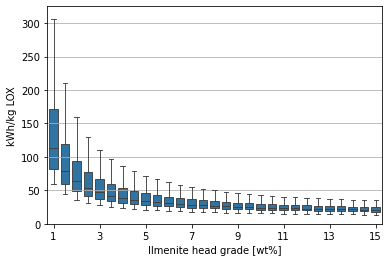

In [2]:
total_df = pd.DataFrame(monte_carlo_dict[1], columns=np.linspace(1, 16, 31))
plt.figure(figsize=(6, 4))
plt.gca().grid(axis='y')
sns.boxplot(data=total_df,color='C0',width=0.75, fliersize=0.5, linewidth=0.9, showfliers=False, dodge=False) # To show outliers, set showfliers=True
plt.gca().set_xlabel('Ilmenite head grade [wt%]')
plt.gca().set_ylabel('kWh/kg LOX')

plt.xticks([0, 4, 8, 12, 16, 20, 24, 28],[1, 3, 5, 7, 9, 11, 13, 15])
plt.gca().set_xlim((-0.55, 28.55))
plt.gca().set_ylim((0., 325))
plt.gca().set_xlim((-0.55, 28.55))

plt.savefig('systematics_quantiles.png', bbox_inches='tight', dpi=400)

# Per parameter
## Check if quantiles are constant

In [3]:
non_constant_keys = []
for key in monte_carlo_individual.keys():
    q1 = np.quantile(monte_carlo_individual[key][1], 0.25, axis=0)
    q3 = np.quantile(monte_carlo_individual[key][1], 0.75, axis=0)
    median = np.median(monte_carlo_individual[key][1], axis=0)
    
    q1_av = np.mean(q1, axis=0)
    q3_av = np.mean(q3, axis=0)
    median_av = np.mean(median, axis=0)

    q1_std = np.std(q1/median*100, axis=0)
    q3_std = np.std(q3/median*100, axis=0)
    
    q1_av = np.mean(q1/median*100, axis=0)
    q3_av = np.mean(q3/median*100, axis=0)    
    
    q1_diff = (np.max(q1/median*100) - np.min(q1/median*100))/2
    q3_diff = (np.max(q3/median*100) - np.min(q3/median*100))/2
    
    extra = ''
    diff = (q1_diff + q3_diff)/2

    if (diff > 1.):
        extra = f' --> not constant, diff {q1_diff:.2f}, {q3_diff:.2f}'
        non_constant_keys.append(key)
    print(key, f'q1: {np.around(q1_av,2)}, q2: {np.around(q3_av,2)}, {extra}')

cryocooler_efficiency q1: 99.52, q2: 100.52, 
T_hot_reservoir_carnot_cycle q1: 99.37, q2: 100.7, 
T_of_incoming_oxygen q1: 99.96, q2: 100.04, 
enrichment_factor q1: 85.29, q2: 131.5,  --> not constant, diff 7.07, 19.14
benef_ilmenite_recovery q1: 99.82, q2: 100.24, 
motor_efficiency q1: 99.89, q2: 100.14, 
mRover q1: 99.94, q2: 100.06, 
cohCoeff q1: 100.0, q2: 100.0, 
intAngle q1: 100.0, q2: 100.0, 
extAngle q1: 100.0, q2: 100.0, 
vip_thickness q1: 99.72, q2: 100.36, 
vip_thermal_conductivity q1: 99.72, q2: 100.25, 
vip_emissivity q1: 99.9, q2: 100.12, 
cryocooler_efficiency_storage q1: 99.87, q2: 100.15, 
batch_reaction_time_in_hours q1: 95.13, q2: 103.6,  --> not constant, diff 1.89, 1.52
CFI_thickness q1: 97.92, q2: 102.44,  --> not constant, diff 1.23, 1.44
HTMLI_thickness q1: 99.85, q2: 100.23, 
delta_T_insulation q1: 98.13, q2: 101.51, 
reactor_heat_up_time_in_hours q1: 99.83, q2: 100.21, 
T_regolith_in q1: 98.2, q2: 101.38,  --> not constant, diff 1.23, 0.95
T_pre_heater q1: 98.

## Figure of non-constant quantiles

Enrichment factor 37.92
Batch reaction time (hours) 5.15
CFI thickness (m) 2.61
$T$ (Regolith in) 1.83
System efficiency 3.15


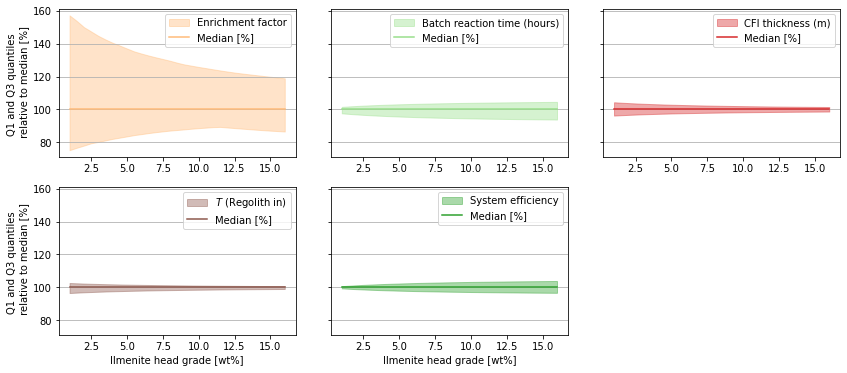

In [4]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(
    14, 6), sharex=False, gridspec_kw={'hspace': 0.2, 'wspace': 0.15}, sharey=True)

df = pd.DataFrame(
    {'Process': [], 'Relative uncertainty [%]': [], 'Parameter': []})

process_label = process_labels[6]
process_index = process_indexes[6]

for i, ax in enumerate(axs.ravel()):
    if i == len(non_constant_keys):
        break
    key = non_constant_keys[i]
    label = find_new_label_name(key)
    color = find_label_color(key)
    
    mu = np.mean(monte_carlo_individual[key][1][:], axis=0)
    std = np.std(monte_carlo_individual[key][1][:], axis=0)
    q1 = np.quantile(monte_carlo_individual[key][1][:], 0.25, axis=0)
    q3 = np.quantile(monte_carlo_individual[key][1][:], 0.75, axis=0)
    median = np.median(monte_carlo_individual[key][1][:], axis=0)
    
    print(label, np.around(np.mean(std/mu*100), 2))
    new_row = pd.DataFrame({'Process': [process_label],
                                'Relative uncertainty [%]': [np.around(std / mu * 100, 4)],
                                'Parameter': [label]})
    df = pd.concat([df, new_row], ignore_index=True)
        
    ax.fill_between(x=ilmenite_wt, y1=q1/median*100, y2=q3/median*100, alpha=0.4, color=color, label=label)
    ax.errorbar(ilmenite_wt, y=median/median*100, label='Median [%]', color=color)
    
    ax.grid(axis='y')
    ax.legend()

axs[0, 0].set_ylabel(
    'Q1 and Q3 quantiles \n relative to median [%]')
axs[1, 0].set_ylabel(
    'Q1 and Q3 quantiles \n relative to median [%]')
for _ in range(0, 3):
    axs[1, _].set_xlabel('Ilmenite head grade [wt%]')

if len(non_constant_keys) < 6:
    fig.delaxes(axs[1, 2])

plt.savefig('systematics_per_process_per_param.png',
            dpi=400, bbox_inches='tight')

# At 10 wt% ilmenite
## Per process

In [5]:
process_wt_10 = pd.DataFrame(
    {'Process': [], 'Median': [], 'Q1': [], 'Q3': []})

for i, label in enumerate(process_labels):
    process_index = i #process_indexes[i]

    q1 = np.quantile(monte_carlo_dict[0][:, process_index], 0.25, axis=0)
    q3 = np.quantile(monte_carlo_dict[0][:, process_index], 0.75, axis=0)
    median = np.median(monte_carlo_dict[0][:, process_index], axis=0)
    
    new_row = pd.DataFrame({'Process': [label],
                            'Median': [np.around(median[wt_10], 3)],
                            'Q1': [np.around(q1[wt_10], 3)],
                            'Q3': [np.around(q3[wt_10], 3)],
                            })
    process_wt_10 = pd.concat([process_wt_10, new_row], ignore_index=True)
process_wt_10

,Process,Median,Q1,Q3
0,Excavation,0.002,0.002,0.003
1,Transportation,0.147,0.114,0.199
2,Beneficiation,0.129,0.097,0.185
3,Hydrogen Reduction,13.046,10.193,18.949
4,Electrolysis,9.260,8.605,10.059
5,Liquefaction,1.159,0.971,1.388
6,Storage,0.311,0.254,0.376


## Per parameter
### In percent

In [6]:
param_wt_10 = pd.DataFrame(
    {'Parameter': [], 'Q1': [], 'Q3': [], 'Diff': []})

for key in monte_carlo_individual.keys():
    label = find_new_label_name(key)
    color = find_label_color(key)

    q1 = np.quantile(monte_carlo_individual[key][1], 0.25, axis=0)
    q3 = np.quantile(monte_carlo_individual[key][1], 0.75, axis=0)
    median = np.median(monte_carlo_individual[key][1], axis=0)

    new_row = pd.DataFrame({'Parameter': [key],
                                'Q1': [np.around(q1[wt_10]/median[wt_10]*100, 2)],
                                'Q3': [np.around(q3[wt_10]/median[wt_10]*100, 2)],
                                'Diff': [(np.around((q3[wt_10]/median[wt_10]) - (q1[wt_10]/median[wt_10]), 4))*100],
                                })
    param_wt_10 = pd.concat([param_wt_10, new_row], ignore_index=True)
param_wt_10.sort_values(by=['Diff'], ascending=False)[0:5]

,Parameter,Q1,Q3,Diff
3,enrichment_factor,88.64,125.85,37.21
14,batch_reaction_time_in_hours,94.57,104.05,9.48
21,system_efficiency,97.18,103.30,6.12
15,CFI_thickness,98.28,102.02,3.73
20,T_pre_heater,98.40,101.63,3.23


### In kwh/kg LOX

In [7]:
param_wt_10 = pd.DataFrame(
    {'Parameter': [], 'Q1': [], 'Q3': [], 'Diff': []})

for key in monte_carlo_individual.keys():
    label = find_new_label_name(key)
    color = find_label_color(key)

    q1 = np.quantile(monte_carlo_individual[key][1], 0.25, axis=0)
    q3 = np.quantile(monte_carlo_individual[key][1], 0.75, axis=0)
    median = np.median(monte_carlo_individual[key][1], axis=0)

    new_row = pd.DataFrame({'Parameter': [key],
                                'Median': [np.around(median[wt_10], 3)],
                                'Q1': [np.around(q1[wt_10], 3)],
                                'Q3': [np.around(q3[wt_10], 3)],
                                'Diff': [(np.around((q3[wt_10]) - (q1[wt_10]), 3))],
                                })
    param_wt_10 = pd.concat([param_wt_10, new_row], ignore_index=True)
param_wt_10.sort_values(by=['Diff'], ascending=False)[0:5]

,Parameter,Q1,Q3,Diff,Median
3,enrichment_factor,21.569,30.623,9.054,24.334
14,batch_reaction_time_in_hours,23.148,25.469,2.320,24.478
21,system_efficiency,23.856,25.359,1.503,24.549
15,CFI_thickness,24.170,25.088,0.918,24.592
20,T_pre_heater,24.190,24.983,0.793,24.583
